SNR=0dB


100%|██████████| 5/5 [00:34<00:00,  6.85s/it]


SNR=1dB


100%|██████████| 5/5 [00:35<00:00,  7.13s/it]


SNR=2dB


100%|██████████| 5/5 [00:39<00:00,  7.81s/it]


SNR=3dB


100%|██████████| 5/5 [00:37<00:00,  7.41s/it]


SNR=4dB


100%|██████████| 5/5 [00:35<00:00,  7.05s/it]


SNR=5dB


100%|██████████| 5/5 [00:37<00:00,  7.58s/it]


SNR=6dB


100%|██████████| 5/5 [00:32<00:00,  6.43s/it]


SNR=7dB


100%|██████████| 5/5 [00:34<00:00,  6.99s/it]


SNR=8dB


100%|██████████| 5/5 [00:33<00:00,  6.71s/it]


SNR=9dB


100%|██████████| 5/5 [00:34<00:00,  6.81s/it]


SNR=10dB


100%|██████████| 5/5 [00:34<00:00,  6.88s/it]


SNR=11dB


100%|██████████| 5/5 [00:33<00:00,  6.65s/it]


SNR=12dB


100%|██████████| 5/5 [00:31<00:00,  6.36s/it]


SNR=13dB


100%|██████████| 5/5 [00:34<00:00,  6.97s/it]


SNR=14dB


100%|██████████| 5/5 [00:33<00:00,  6.70s/it]


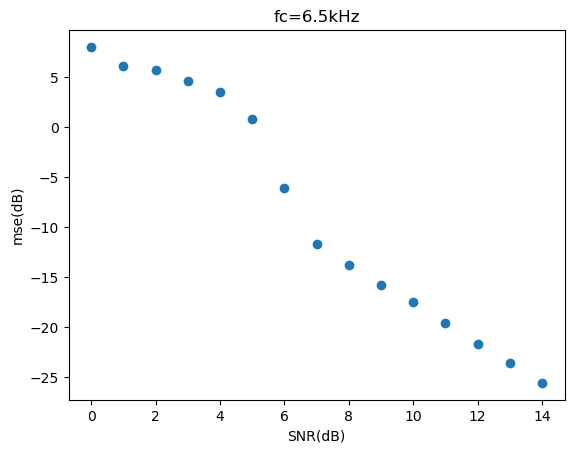

In [1]:
from bf_multichannel import bf_multichannel
import numpy as np
import matplotlib.pyplot as plt

# fc = 6.5kHz
My_bf = bf_multichannel(6.5e3, 2, 5)
# rx at (0,0)
# tx_1 at (5,5) with a wall at x=10
# after relection, tx_2 at (15,5)
My_bf.reflection_list = np.array([1,0.5])
My_bf.x_tx_list = np.array([5,15])
My_bf.y_tx_list = np.array([5,5])

My_bf.simulation()

# plt mean square error
plt.figure()
plt.plot(My_bf.snr_list, My_bf.mean_mse, 'o')
plt.xlabel('SNR(dB)')
plt.ylabel('mse(dB)')
plt.title(f'fc={My_bf.fc/1000:.1f}kHz')
plt.show()